# Inference

## Import Libraries

In [2]:
# import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style("darkgrid")

## Load the dataset

In [3]:
# load the dataset 
use_cols = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS','RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

data = pd.read_csv("./data/boston-housing-dataset.csv",
                   usecols=use_cols)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2



| Feature | Description |
|---------|-------------|
| **CRIM** | Per capita crime rate by town |
| **ZN** | Proportion of residential land zoned for lots over 25,000 sq.ft. |
| **INDUS** | Proportion of non-retail business acres per town |
| **CHAS** | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| **NOX** | Nitric oxides concentration (parts per 10 million) |
| **RM** | Average number of rooms per dwelling |
| **AGE** | Proportion of owner-occupied units built prior to 1940 |
| **DIS** | Weighted distances to five Boston employment centres |
| **RAD** | Index of accessibility to radial highways |
| **TAX** | Full-value property-tax rate per $10,000 |
| **PTRATIO** | Pupil-teacher ratio by town |
| **LSTAT** | Percent of households with low socioeconomic status |
| **MEDV** *(Target)* | Median value of owner-occupied homes in $1000's |

In [4]:
df = data[['RM','MEDV']]
df.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


## Linear Regression 

In [5]:
# import library 
import statsmodels.formula.api as smf

# build and fit the simple linear regression model
fitted_reg = smf.ols(
    formula='MEDV ~ RM',
    data=df
).fit()

# view the summary
fitted_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 30 Dec 2025   Prob (F-statistic):           2.49e-74
Time:                        16:23:44   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# let us separate out the coeffecients of this SLR model
betas = fitted_reg.params
betas

Intercept   -34.670621
RM            9.102109
dtype: float64

In [7]:
# fitted values 
fitted_reg.fittedvalues

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

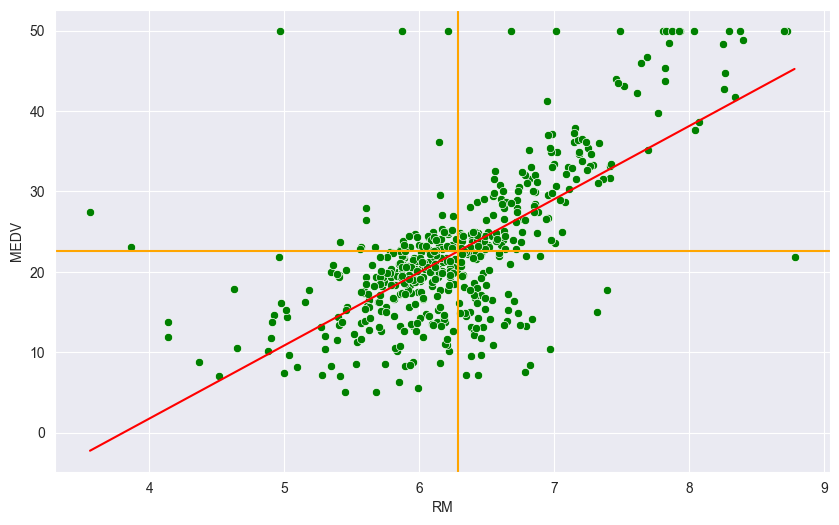

In [8]:
# let us draw the line 
# let us do a scatterplot 
plt.figure(figsize=(10,6))

sns.scatterplot(data=data,
                x='RM',
                y='MEDV',
                color='green')

mean_x = np.mean(df['RM'])
mean_y = np.mean(df['MEDV'])

sns.lineplot(x=df['RM'],
             y=fitted_reg.fittedvalues,
             color='red')

# let us now draw two lines for the mean 
plt.axhline(y=mean_y,
            color='orange')
plt.axvline(x=mean_x,
            color='orange')

## Inference: Test of the Slope Coefficient

We now test whether the predictor **RM** has a statistically significant linear relationship with **MEDV**.


### 1️⃣ Hypothesis Formulation

We test:

$
H_0:\ \beta_1 = 0
$

$
H_a:\ \beta_1 \neq 0
$

Interpretation:

* **Null hypothesis**: RM has no linear effect on MEDV
* **Alternative hypothesis**: RM has a non-zero linear effect

### 2️⃣ Test Statistic

The test statistic for the slope is:

$
t = \frac{\hat{\beta}_1 - 0}{\text{SE}(\hat{\beta}_1)}
$

Under $(H_0)$, this statistic follows a **t-distribution** with:

$
\text{df} = n - 2
$


### 3️⃣ Perform the Test in Code (`smf`)

In [11]:
import statsmodels.formula.api as smf

# fit the model
model = smf.ols('MEDV ~ RM', data=df).fit()

# extract slope estimate, standard error, t-statistic, and p-value
beta1_hat = model.params['RM']
se_beta1 = model.bse['RM']
t_stat = model.tvalues['RM']
p_value = model.pvalues['RM']

beta1_hat, se_beta1, t_stat, p_value

(np.float64(9.10210898118031),
 np.float64(0.4190265601213405),
 np.float64(21.72203351153814),
 np.float64(2.4872288710080936e-74))


### 4️⃣ Decision Rule

At significance level ( $\alpha$ = 0.05 ):

* If **p-value < 0.05** → Reject $(H_0)$
* If **p-value ≥ 0.05** → Fail to reject $(H_0)$

### 5️⃣ Interpretation 

* The estimated slope $( \hat{\beta}_1 )$ measures the change in median house value for a one-unit increase in RM.
* The t-test evaluates whether this estimated change could plausibly be zero.
* A small p-value provides evidence that the relationship is statistically significant.

📌 **Statistical significance ≠ practical importance**
Always interpret the magnitude of the slope.

### 6️⃣ Confidence Interval View (Equivalent Inference)

Instead of a test, we can use a confidence interval.


In [12]:
model.conf_int().loc['RM']

0    8.278855
1    9.925363
Name: RM, dtype: float64

Interpretation:

* If the interval **does not contain 0**, the slope is significant at the corresponding confidence level.
* This is equivalent to the two-sided t-test.

### 7️⃣ Connection to Error Variance (Critical Insight)

Recall:

$
\text{SE}(\hat{\beta}_1)
= \sqrt{\frac{\hat{\sigma}^2}{\sum (X_i - \bar X)^2}}
$

So the slope becomes significant when:

* noise $(( \hat{\sigma}^2 ))$ is small
* variability in RM is large
* sample size is sufficient

### 8️⃣ Teaching Line

> *Inference is where regression stops being descriptive
> and starts making probabilistic claims.*

### Final Takeaways

* The slope t-test checks whether the predictor contributes linearly
* The test uses a t-distribution with ( n - 2 ) degrees of freedom
* p-values and confidence intervals give equivalent conclusions
* Significance depends on **signal, noise, and variation in X**